<a href="https://colab.research.google.com/github/denverkim/Data-Analysis/blob/main/CLASS_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 설정
num_rows = 100
regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산']
products = ['노트북', '스마트폰', '태블릿', '헤드폰', '모니터', '프린터']
regions

['서울', '부산', '대구', '인천', '광주', '대전', '울산']

In [ ]:
import pandas as pd
import random
from datetime import datetime, timedelta

# 설정
num_rows = 100
regions = ['서울', '부산', '대구', '인천', '광주', '대전', '울산']
products = ['노트북', '스마트폰', '태블릿', '헤드폰', '모니터', '프린터']

# 날짜 생성 함수
def random_date(start, end):
    return start + timedelta(days=random.randint(0, (end - start).days))

# 데이터 생성
data = []
start_date = datetime(2023, 1, 1)
end_date = datetime(2025, 9, 1)

for _ in range(num_rows):
    date = random_date(start_date, end_date).strftime('%Y-%m-%d')
    region = random.choice(regions)
    product = random.choice(products)
    quantity = random.randint(1, 20)

    # 제품별 단가 설정
    price_list = {
        '노트북': 1200000,
        '스마트폰': 900000,
        '태블릿': 600000,
        '헤드폰': 150000,
        '모니터': 300000,
        '프린터': 200000
    }

    sales = quantity * price_list[product]

    data.append([date, region, product, sales, quantity])

# DataFrame 생성
df = pd.DataFrame(data, columns=['판매일자', '지역', '상품명', '매출액', '판매수량'])

# 출력 (또는 CSV 저장)
print(df.head(10))  # 상위 10개만 확인

# 저장하려면 아래 코드 사용
df.to_csv('sales_data.csv', index=False, encoding='utf-8-sig')

         판매일자  지역   상품명       매출액  판매수량
0  2023-07-07  부산   헤드폰   3000000    20
1  2023-09-12  서울  스마트폰   8100000     9
2  2025-05-11  인천   헤드폰    900000     6
3  2023-09-09  광주   모니터   2700000     9
4  2025-06-28  대구   노트북   1200000     1
5  2023-06-03  대전   프린터   1200000     6
6  2023-02-27  부산   프린터   4000000    20
7  2024-09-04  광주   노트북  19200000    16
8  2024-05-11  서울   모니터   3300000    11
9  2024-02-09  울산   헤드폰   2250000    15


In [ ]:
# 파일 열기
df = pd.read_csv('/content/business_sample_data.csv')
df.head()#  상위 5개 데이

,Date,Region,Product,Sales,Quantity
0,2024-02-21,Seoul,Phone,1472,2
1,2024-01-15,Seoul,Phone,1894,2
2,2024-03-12,Incheon,Tablet,759,1
3,2024-03-01,Seoul,Headphones,863,3
4,2024-01-21,Daegu,Phone,1054,2


In [ ]:
# 전처리
df.isna().sum()

,0
Date,0
Region,0
Product,0
Sales,0
Quantity,0


In [ ]:
# 데이터분석
# 기술통계: 합계, 평균, 분포-그룹별집계: 월별/지역별/상품별
df.describe()


,Sales,Quantity
count,100.000000,100.000000
mean,1058.120000,2.460000
std,547.233211,1.140795
min,101.000000,1.000000
25%,571.250000,1.000000
50%,1054.000000,2.000000
75%,1520.750000,3.250000
max,1984.000000,4.000000


In [ ]:
df['판매월'] = pd.to_datetime(df['Date']).dt.month
df.head()

,Date,Region,Product,Sales,Quantity,판매월
0,2024-02-21,Seoul,Phone,1472,2,2
1,2024-01-15,Seoul,Phone,1894,2,1
2,2024-03-12,Incheon,Tablet,759,1,3
3,2024-03-01,Seoul,Headphones,863,3,3
4,2024-01-21,Daegu,Phone,1054,2,1


In [ ]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

<Axes: xlabel='판매월'>

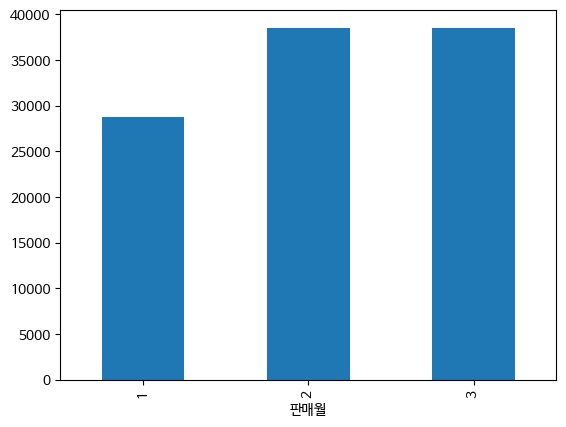

In [ ]:
df.groupby('판매월').sum()['Sales'].plot(kind='bar')

<Axes: xlabel='Region'>

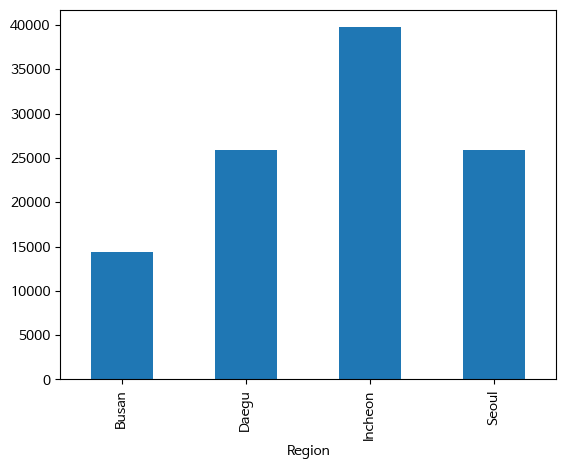

In [ ]:
df.groupby('Region').sum()['Sales'].plot(kind='bar')


<Axes: xlabel='Product'>

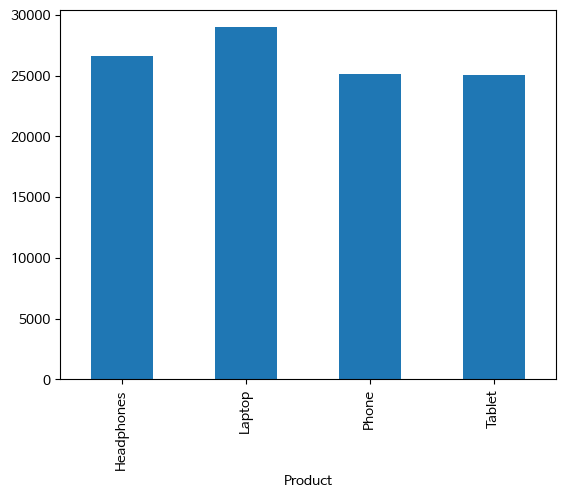

In [ ]:
df.groupby('Product').sum()['Sales'].plot(kind='bar')

df.groupby('Region').sum()